In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
df = pd.read_csv("/Users/sylvie/Documents/5507类型/奇幻玄幻/merge_奇幻_cleaned.csv", encoding='utf-8-sig')


In [ ]:
df['comment_time'] = pd.to_datetime(df['日期'], errors='coerce')  
df = df.dropna(subset=['comment_time'])

df['total_minutes'] = df['comment_time'].dt.hour * 60 + df['comment_time'].dt.minute
df['20min_group'] = df['total_minutes'] // 20
def get_group_start_time(group_num):
    total_min = group_num * 20
    hour = total_min // 60
    minute = total_min % 60
    return f"{hour:02d}:{minute:02d}"  
df['20min_start'] = df['20min_group'].apply(get_group_start_time)
df['20min_num'] = df['20min_group'] * 20 / 60  


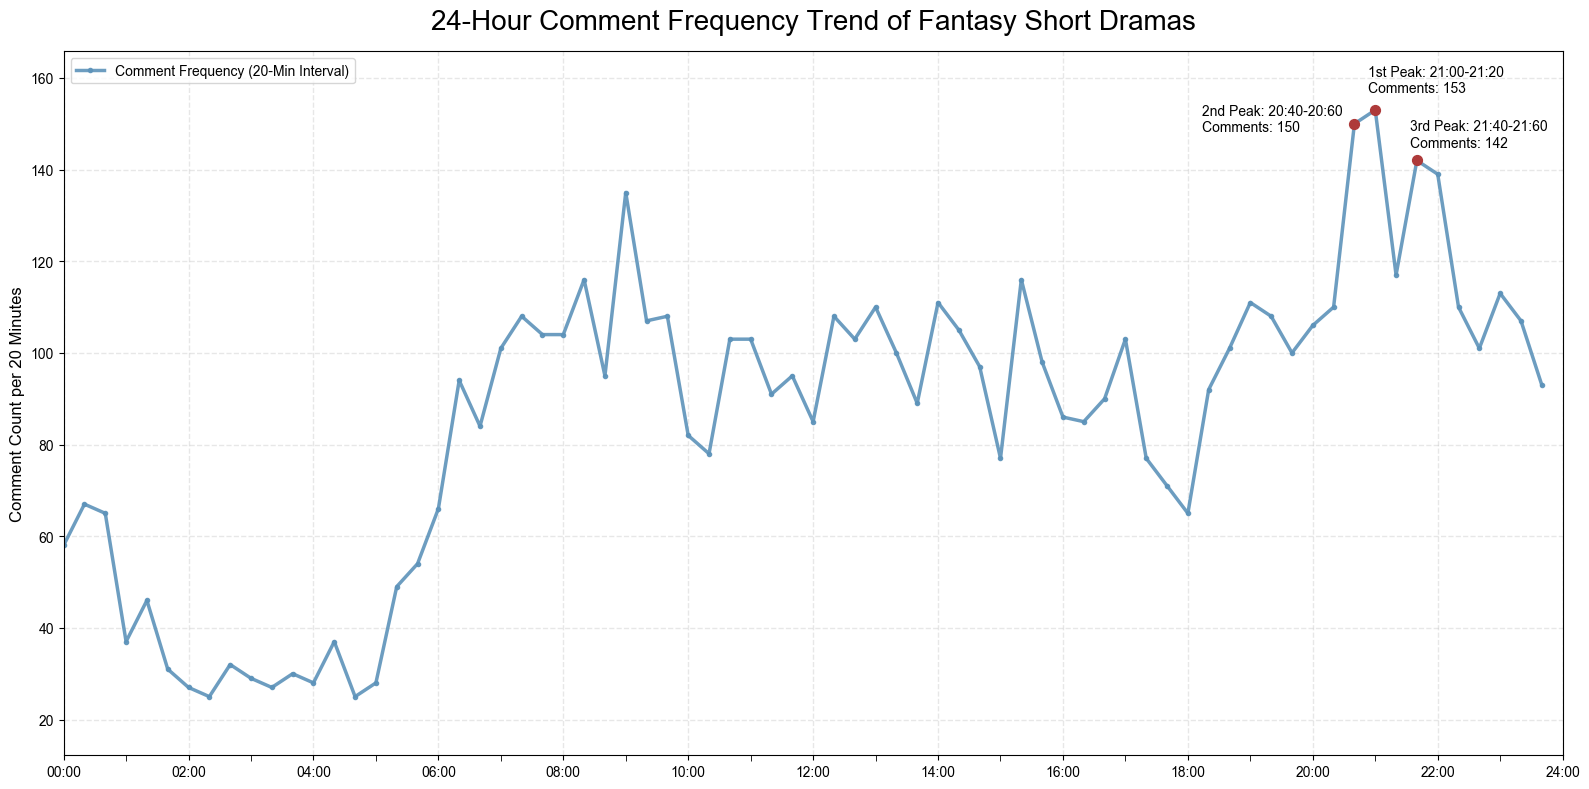

In [ ]:
comment_freq = df.groupby(['20min_num', '20min_start']).size().reset_index(name='comment_count')
comment_freq = comment_freq.sort_values('20min_num').reset_index(drop=True)

top3_peaks = comment_freq.nlargest(3, 'comment_count').reset_index(drop=True)
top3_peaks['rank'] = ['1st', '2nd', '3rd']

plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(
    comment_freq['20min_num'], 
    comment_freq['comment_count'],
    color="#5d93ba", 
    linewidth=2.5,  
    alpha=0.9,
    marker='o',  
    markersize=3,
    label='Comment Frequency (20-Min Interval)'
)

for _, peak in top3_peaks.iterrows():
    ax.scatter(
        peak['20min_num'], 
        peak['comment_count'],
        color="#AE3A3A", 
        s=50, 
        zorder=5  
    )

peak1 = top3_peaks.iloc[0]
ax.annotate(
    f"1st Peak: {peak1['20min_start']}-{int(peak1['20min_start'].split(':')[0])}:{int(peak1['20min_start'].split(':')[1])+20:02d}\nComments: {peak1['comment_count']}",
    xy=(peak1['20min_num'], peak1['comment_count']),
    xytext=(-5, 13),  
    textcoords='offset points',
    fontsize=10,
    fontweight='bold',
    color='black',
)

peak2 = top3_peaks.iloc[1]
ax.annotate(
    f"2nd Peak: {peak2['20min_start']}-{int(peak2['20min_start'].split(':')[0])}:{int(peak2['20min_start'].split(':')[1])+20:02d}\nComments: {peak2['comment_count']}",
    xy=(peak2['20min_num'], peak2['comment_count']),
    xytext=(-110, -5), 
    textcoords='offset points',
    fontsize=10,
    fontweight='bold',
    color='black'
)

peak3 = top3_peaks.iloc[2]
ax.annotate(
    f"3rd Peak: {peak3['20min_start']}-{int(peak3['20min_start'].split(':')[0])}:{int(peak3['20min_start'].split(':')[1])+20:02d}\nComments: {peak3['comment_count']}",
    xy=(peak3['20min_num'], peak3['comment_count']),
    xytext=(-5, 10), 
    textcoords='offset points',
    fontsize=10,
    fontweight='bold',
    color='black'
)

ax.set_xlim(0, 24)
ax.set_xticks(range(0, 25, 2))
ax.set_xticklabels([f"{h:02d}:00" for h in range(0, 25, 2)])
ax.set_xticks(range(0, 24), minor=True)
ax.tick_params(axis='x', which='minor', length=4)


ax.set_ylabel('Comment Count per 20 Minutes', fontsize=12, fontweight='medium')  
ax.set_title('24-Hour Comment Frequency Trend of Fantasy Short Dramas', fontsize=20, fontweight='bold', pad=16)


ax.grid(True, alpha=0.3, linestyle='--', linewidth=1)
ax.legend(fontsize=10, loc='upper left')
ax.margins(y=0.1)

plt.tight_layout()

In [ ]:
import os
save_folder = r"/Users/sylvie/Documents/5507_Category"
save_path = os.path.join(save_folder, "24H_Comment_Frequency_20Min_Interval.png")
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"图表已保存至：{save_path}")

plt.show()

图表已保存至：/Users/sylvie/Documents/5507_Category/24H_Comment_Frequency_20Min_Interval.png


<Figure size 640x480 with 0 Axes>